In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd

PATH = "physionet.org/files/sleep-accel/1.0.0/heart_rate"

In [46]:
def process_file(file):
    data = pd.read_csv(PATH + "/" + file, ",", header=None, names=['seconds', 'bpm'])
    
    data.drop_duplicates(keep='first', inplace=True) 
    
    data = data[data["seconds"] >= 0]
    data.reset_index(drop=True, inplace=True)
    
    max = data["seconds"].max()
    min = data["seconds"].min()

    tot_seconds = int(max - min)
       
    print(file, data.shape[0], tot_seconds, int(tot_seconds / 3600))

    plt.figure(figsize=(12,6))
    plt.plot(data["seconds"].values)
    plt.show()
    

8000685_heartrate.txt 5792 30046 8


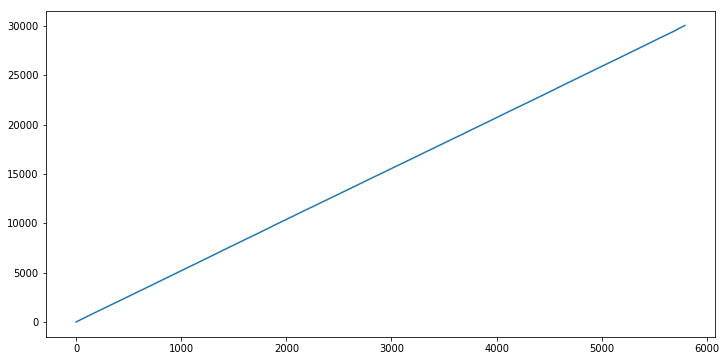

6220552_heartrate.txt 5875 30369 8


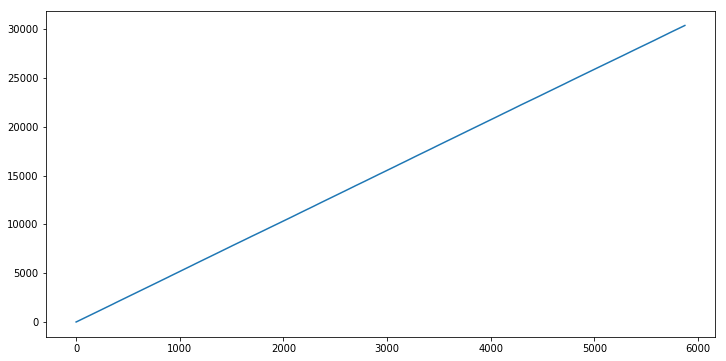

8686948_heartrate.txt 5760 29919 8


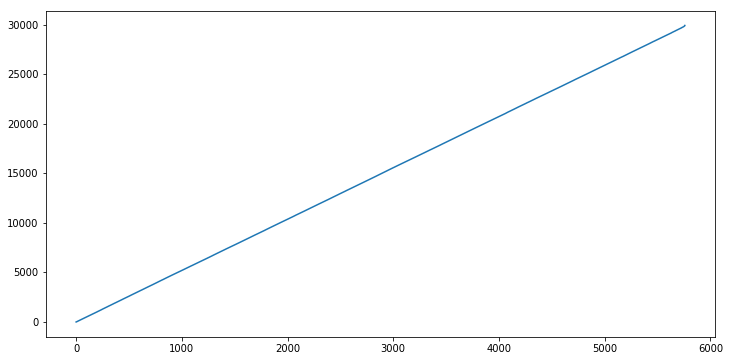

1066528_heartrate.txt 4968 34484 9


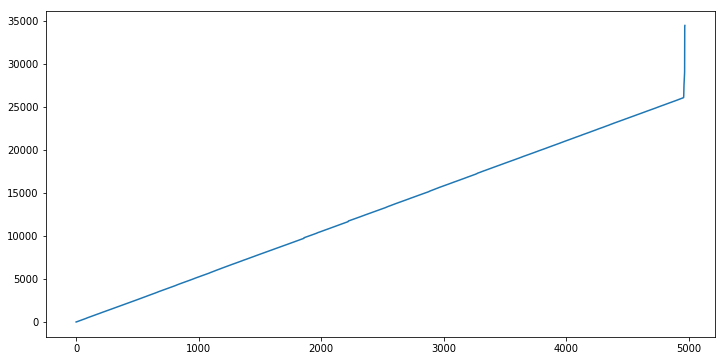

844359_heartrate.txt 5548 28991 8


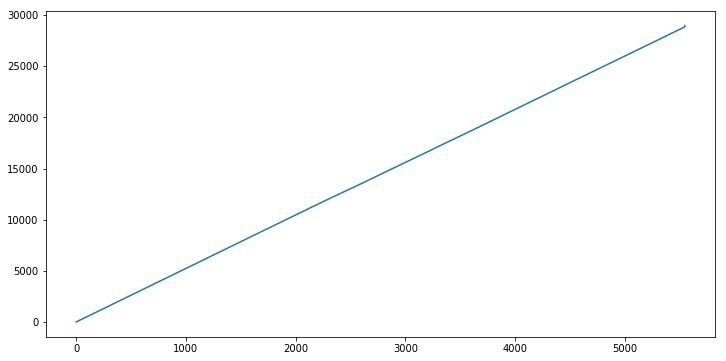

1818471_heartrate.txt 5972 31022 8


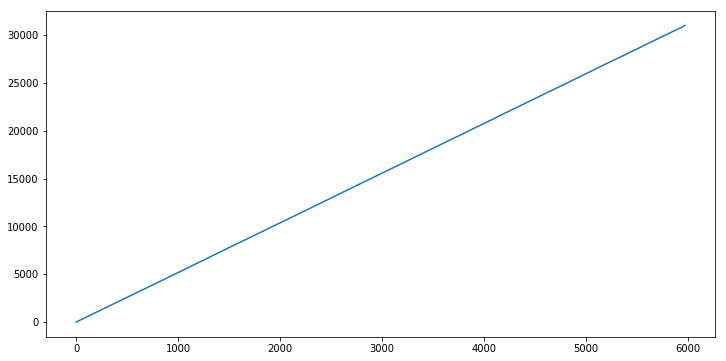

3997827_heartrate.txt 5741 29621 8


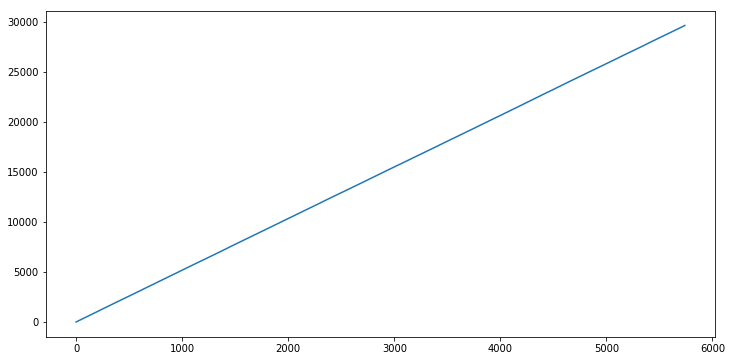

1360686_heartrate.txt 5632 29309 8


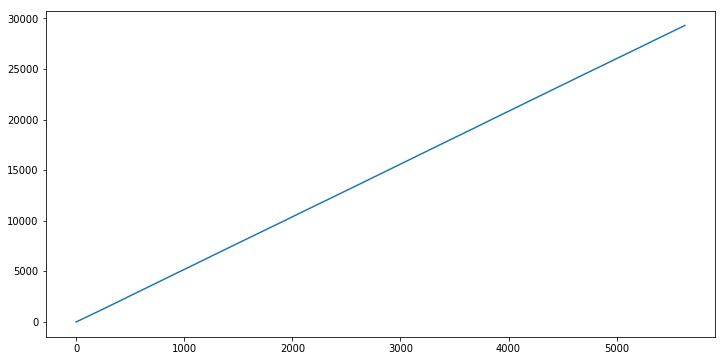

5498603_heartrate.txt 4485 23265 6


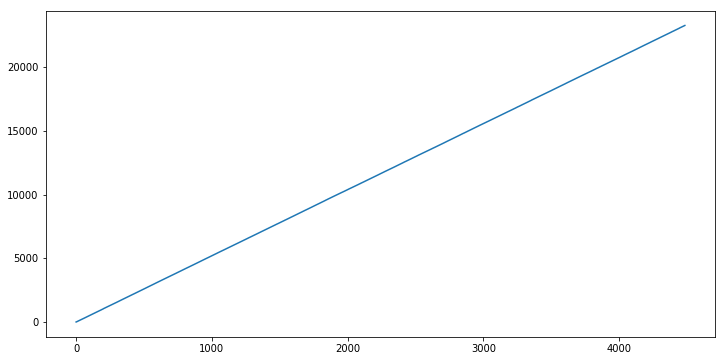

781756_heartrate.txt 5825 37540 10


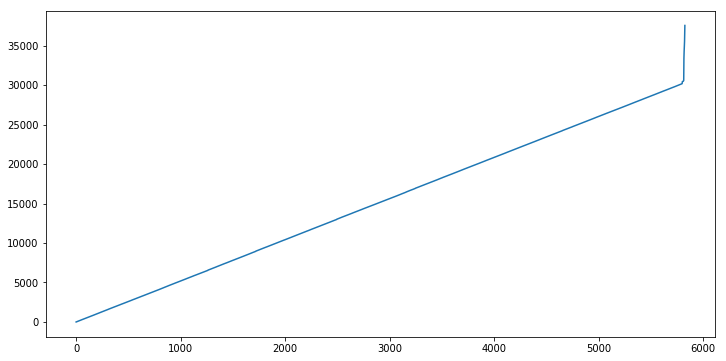

2598705_heartrate.txt 5458 30138 8


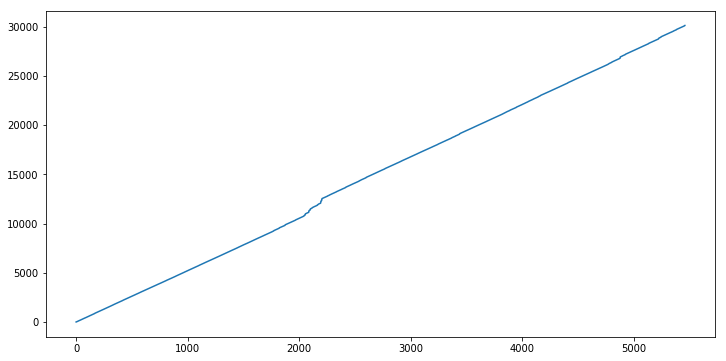

2638030_heartrate.txt 5757 30209 8


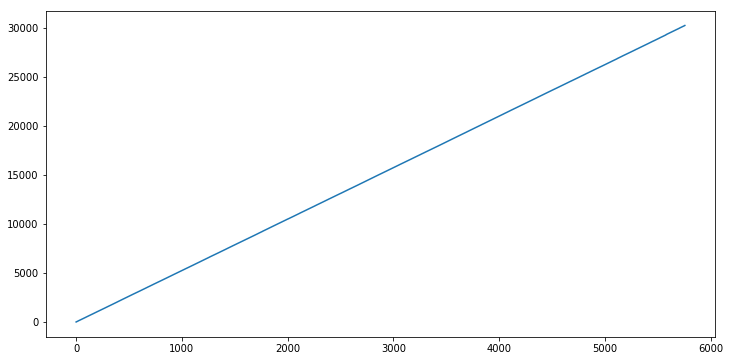

9961348_heartrate.txt 5355 29241 8


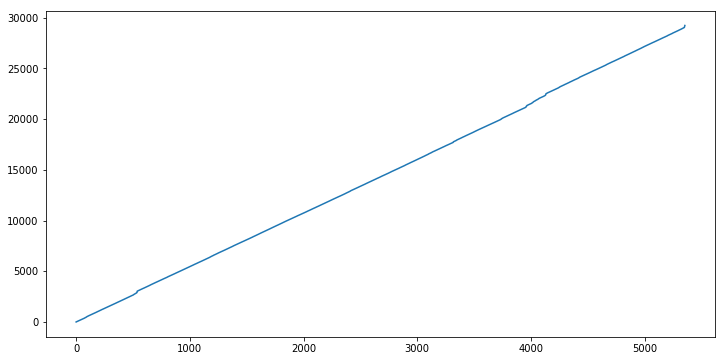

7749105_heartrate.txt 840 29642 8


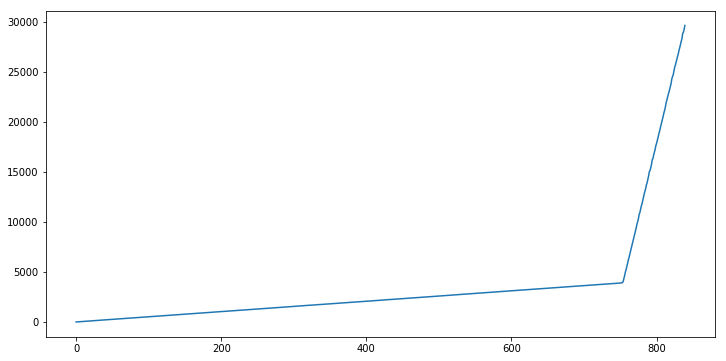

4426783_heartrate.txt 5677 29588 8


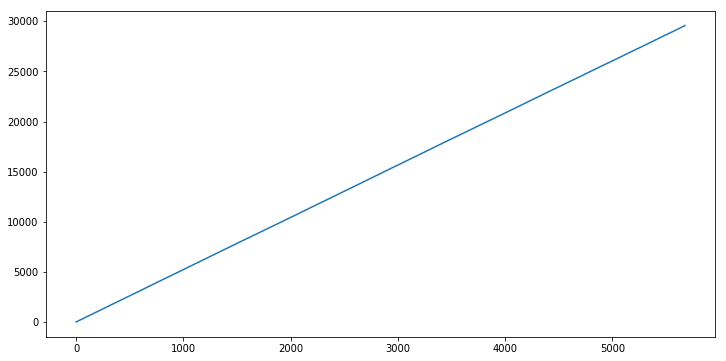

4314139_heartrate.txt 5636 29611 8


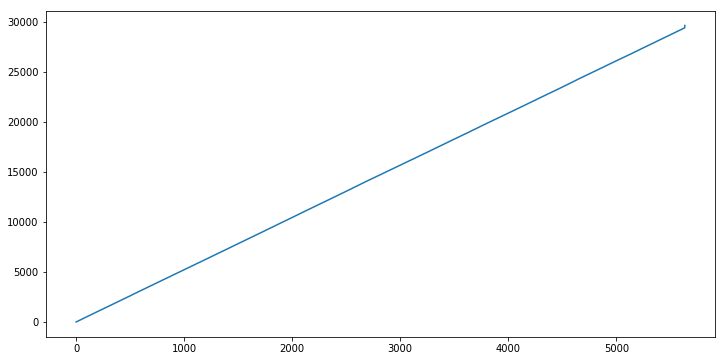

9618981_heartrate.txt 5426 28346 7


In [ ]:
for file in os.listdir(PATH):
    if file.endswith(".txt"):
        process_file(file)